## Smart Submeters - First Visualisation Examples


<br>  
                     
                           Exploring and Visualizing Energy Consumption
                    
   
                       
 <br> Goal: Showing first examples for daily, weekly and monthly energy consumption. 
 <br>  
 For each of the "Smart Submeters" in kitchen, laundry room and Heating/AC-system different time frames 
 
 are useful to give customers some information benefits. 
 <br>  
 These random examples should give the client a first impression how energy data can be
 viusualized in this regard.


<br>




#### LOADING LIBRARIES

In [ ]:
library(RMySQL)
library(DBI)
library(dplyr)
library(lubridate)
library(ggplot2)
library(lubridate)
library(anytime)
library(tidyverse)
library(arules)
library(base)
library(scales)
library(tidyr)
library(grid)
library(gridExtra)

### Data Base Connection & Downloading relevant Data

In [2]:
##Create a database connection

con = dbConnect(
  MySQL(),
  user = 'deepAnalytics',
  password = 'Sqltask1234!',
  dbname = 'dataanalytics2018',
  host = 'data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com')

## List the tables contained in the database 

dbListTables(con)
dbListFields(con,"yr_2006")


#query the data base tables


yr_2006 <-
  dbGetQuery(con,
             "SELECT Date, Time, Sub_metering_1, Sub_metering_2,
     Sub_metering_3, Global_active_power FROM yr_2006")

yr_2007 <-
  dbGetQuery(con,
             "SELECT Date, Time, Sub_metering_1, Sub_metering_2,
   Sub_metering_3, Global_active_power FROM yr_2007")

yr_2008 <- 
  dbGetQuery(con,
             "SELECT Date, Time, Sub_metering_1, Sub_metering_2,
     Sub_metering_3, Global_active_power FROM yr_2008")

yr_2009 <-
  dbGetQuery(con,
             "SELECT Date, Time, Sub_metering_1, Sub_metering_2,
     Sub_metering_3, Global_active_power FROM yr_2009")

yr_2010 <-
  dbGetQuery(con,
             "SELECT Date, Time, Sub_metering_1, Sub_metering_2,
     Sub_metering_3, Global_active_power FROM yr_2010")

[1] "iris"    "yr_2006" "yr_2007" "yr_2008" "yr_2009" "yr_2010"

[1] "id"                    "Date"                  "Time"                 
 [4] "Global_active_power"   "Global_reactive_power" "Global_intensity"     
 [7] "Voltage"               "Sub_metering_1"        "Sub_metering_2"       
[10] "Sub_metering_3"

### Data Preparation

In [3]:
#yr_2006 and yr_2010 excluded, no electricty data for complete year

SmartSub <- bind_rows(yr_2007,yr_2008,yr_2009)

In [4]:
#combine Date and Time into DateTime

SmartSub <-cbind(SmartSub,paste(SmartSub$Date,SmartSub$Time), stringsAsFactors=FALSE)

In [5]:
#rename new feature

colnames(SmartSub)[7] <-"DateTime"

In [6]:
#move column to first place in data frame

SmartSub <- SmartSub[,c(ncol(SmartSub), 1:(ncol(SmartSub)-1))]

In [7]:
#remove redundant "Date" and "Time" features

SmartSub <- SmartSub[,-c(2,3)]

In [ ]:
#Convert DateTime into time format

SmartSub$DateTime <- as.POSIXct(SmartSub$DateTime, "%Y/%m/%d %H:%M:%S")

In [9]:
#Add time zone

attr(SmartSub$DateTime, "tzone") <- "Europe/Paris"

In [10]:
#create features 'year','quarter','month','week','weekday,'day','hour','minute'

SmartSub$year <- year(SmartSub$DateTime)

SmartSub$quarter <- quarter(SmartSub$DateTime)

SmartSub$month <- month(SmartSub$DateTime)

SmartSub$week <- week(SmartSub$DateTime)         

SmartSub$weekday <- weekdays(SmartSub$DateTime)

SmartSub$day <- day(SmartSub$DateTime)

SmartSub$hour <- hour(SmartSub$DateTime)

SmartSub$minute <- minute (SmartSub$DateTime)

In [11]:
#rename submeters 

SmartSub <- rename(SmartSub, submeter_kitchen = Sub_metering_1)

SmartSub <- rename(SmartSub, submeter_laundry = Sub_metering_2)

SmartSub <- rename(SmartSub, submeter_heat_AC = Sub_metering_3)

In [12]:
#####measuring total power consumption#####

#convert kilo-watt into watt-minutes

SmartSub <- mutate(SmartSub, total_power = Global_active_power*1000 /60)

In [13]:
#create "total_power" feature

SmartSub <-
  mutate(SmartSub,
         unknown = total_power - submeter_kitchen - submeter_laundry - submeter_heat_AC)

### Data Visualisation
##### First examples for Energy Data Visualisation in regard to location and and time frame

In [14]:
#aggregate values into higher time intervalls

SmartSub1 <- SmartSub %>%
  group_by(DateTime = floor_date(DateTime, "1 hour")) %>%
  summarize(
    submeter_kitchen = sum(submeter_kitchen),
    submeter_laundry = sum(submeter_laundry),
    submeter_heat_AC = sum(submeter_heat_AC),
    unknown = sum(unknown),
    total_power = sum(total_power),
    Global_active_power =sum(Global_active_power)
  )

Warning message:
"Removed 26005 rows containing missing values (geom_path)."

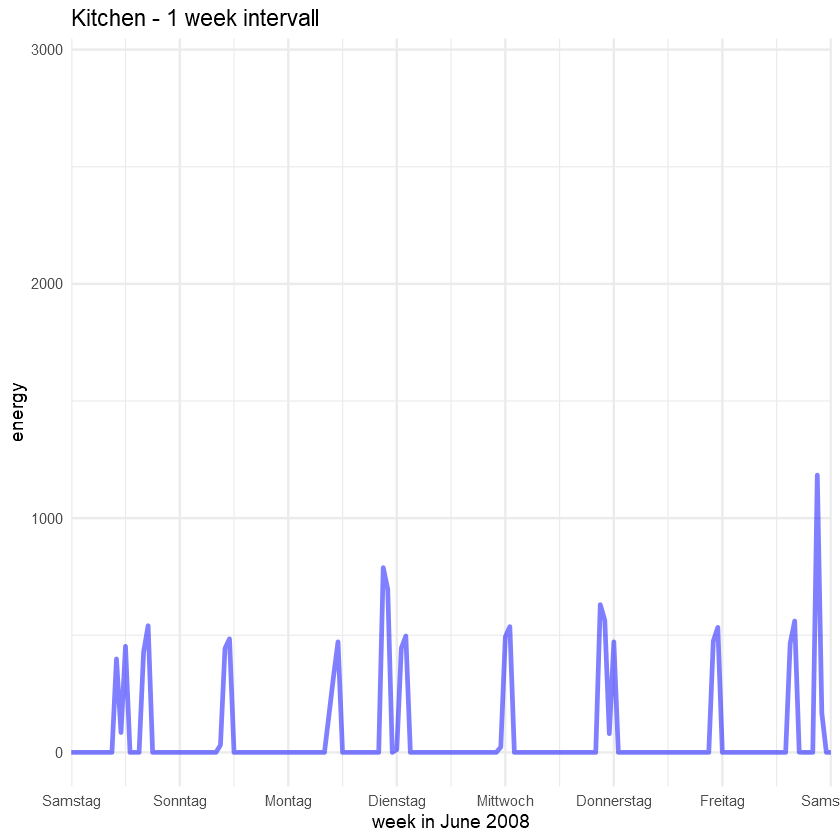

In [33]:
#plotting submeter_kitchen for 1-week-energy-consumption

pl1_k <- ggplot(data = SmartSub1) +
  geom_line(aes(x = DateTime, y = submeter_kitchen), 
            alpha = 0.5,
            size = 1,color = "blue") +

  labs(x = "week in June 2008", 
       y = "energy",
       title = "Kitchen - 1 week intervall") +
  theme_minimal()

pl2_k <-  pl1_k + scale_x_datetime(
  breaks = seq(
    as.POSIXct("2008-06-01 00:00:00"),
    as.POSIXct("2008-06-08 00:00:00"),
    "1 day"),
  labels = date_format("%A"),
  expand = c(0, 0),
  limits = c(
    as.POSIXct("2008-06-01 00:00:00"),
    as.POSIXct("2008-06-08 00:00:00")
  )
) 

pl2_k

Warning message:
"Removed 26005 rows containing missing values (geom_path)."

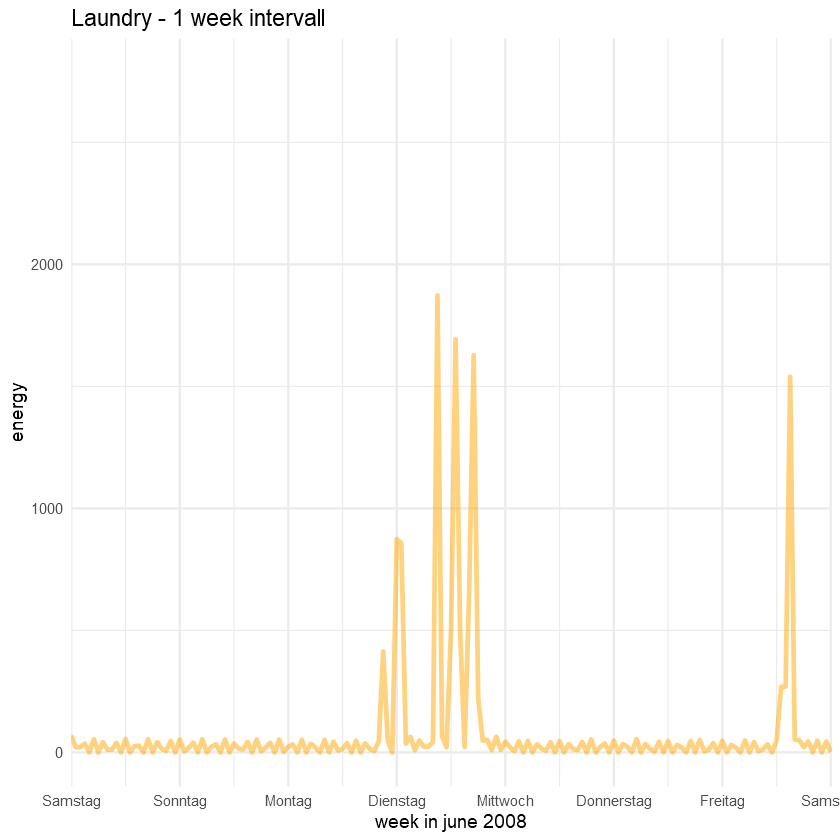

In [31]:
#plotting submeter_laundry for 1-week-energy-consumption

pl1_l <- ggplot(data = SmartSub1) +
  geom_line(aes(x = DateTime, y = submeter_laundry), 
            alpha = 0.5,
            size = 1,color = "orange") +
  labs(x = "week in june 2008", 
       y = "energy",
       title = "Laundry - 1 week intervall") +
  theme_minimal()

pl2_l <-  pl1_l + scale_x_datetime(
  breaks = seq(
    as.POSIXct("2008-06-01 00:00:00"),
    as.POSIXct("2008-06-08 00:00:00"),
    "1 day"),
  labels = date_format("%A"),
  expand = c(0, 0),
  limits = c(
    as.POSIXct("2008-06-01 00:00:00"),
    as.POSIXct("2008-06-08 00:00:00")
  )
)  

pl2_l

Warning message:
"Removed 26005 rows containing missing values (geom_path)."

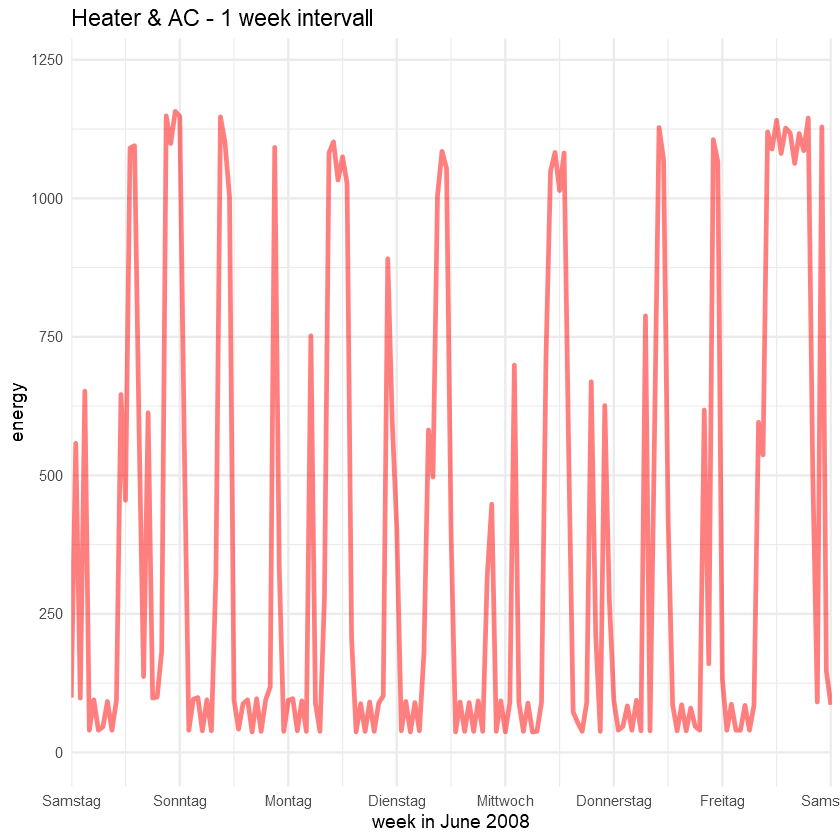

In [32]:
#plotting submeter_heater_AC for 1-week-energy-consumption

pl1_h <- ggplot(data = SmartSub1) +
  geom_line(aes(x = DateTime, y = submeter_heat_AC), 
            alpha = 0.5,
            size = 1,color = "red") +
  labs(x = "week in June 2008", 
       y = "energy",
       title = "Heater & AC - 1 week intervall") +
  theme_minimal()

pl2_h <-  pl1_h + scale_x_datetime(
  breaks = seq(
    as.POSIXct("2008-06-01 00:00:00"),
    as.POSIXct("2008-06-08 00:00:00"),
    "1 day"),
  labels = date_format("%A"),
  expand = c(0, 0),
  limits = c(
    as.POSIXct("2008-06-01 00:00:00"),
    as.POSIXct("2008-06-08 00:00:00")
  )
)  

pl2_h


Warning message:
"Removed 26005 rows containing missing values (geom_path)."Warning message:
"Removed 26005 rows containing missing values (geom_path)."Warning message:
"Removed 26005 rows containing missing values (geom_path)."

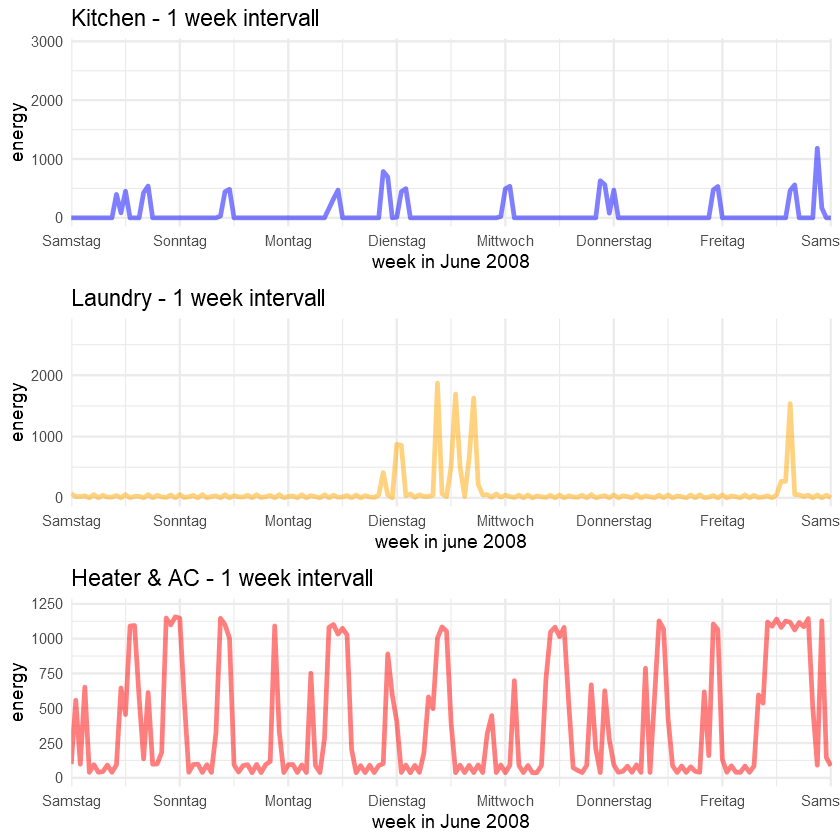

In [34]:
#plotting 3 submeters combined

grid.arrange(pl2_k, pl2_l, pl2_h)

Warning message:
"Removed 104596 rows containing missing values (geom_path)."

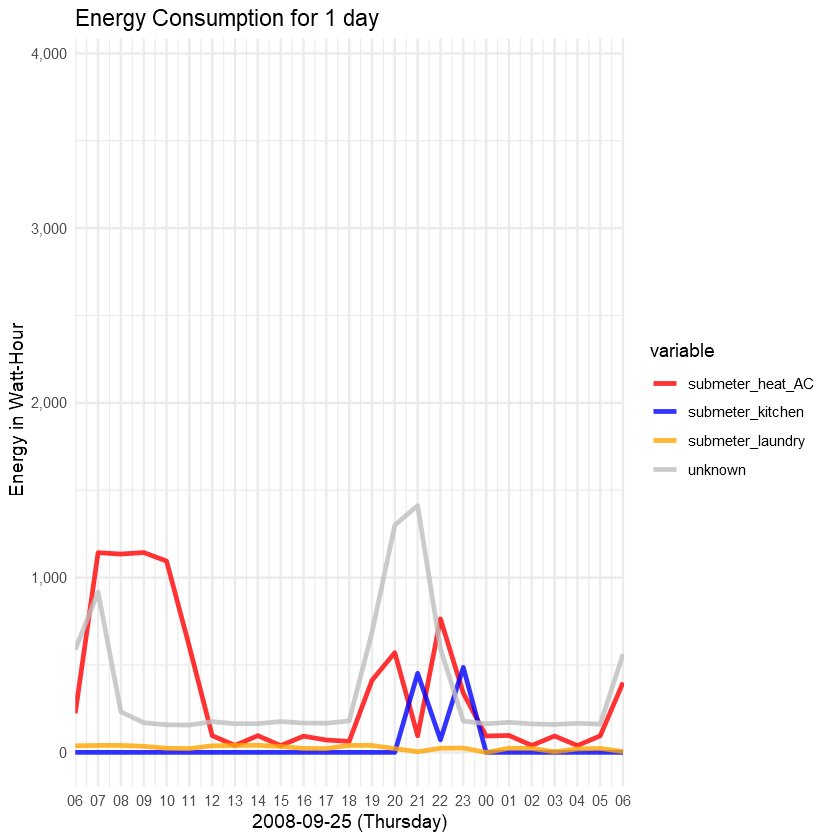

In [42]:
#Viusalisation of 3 graphs in 1 plot####


SmartSub_mul <- SmartSub1 %>% 
  select (DateTime, submeter_heat_AC, submeter_kitchen, submeter_laundry,unknown) %>%
  gather(key = "variable", value = "value", -DateTime)


ggplot(SmartSub_mul, aes(x = DateTime, y = value)) + 
  geom_line(aes(color = variable), alpha = 0.8,
            size = 1) +
  scale_color_manual(values = c( "red","blue", "orange","grey")) +
  labs(x = "2008-09-25 (Thursday)", 
       y = "Energy in Watt-Hour",
       title = "Energy Consumption for 1 day") +
  scale_x_datetime(
    breaks = seq(
      as.POSIXct("2008-09-25 08:00:00"),
      as.POSIXct("2008-09-26 08:00:00"),
      "1 hour"),
    labels = date_format("%H"),
    expand = c(0, 0),
    limits = c(
      as.POSIXct("2008-09-25 08:00:00"),
      as.POSIXct("2008-09-26 08:00:00")
    )
  )  +
  theme_minimal() +
  scale_y_continuous(labels = comma) 